In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.color
import skimage.io

In [24]:
def equalizeImg(img, hist, n, m):
    new_img = np.zeros((n,m))
    res = 0
    k = (len(hist)-1)/(m*n)
    for w in range(n):
        for h in range(m):
            for s in range(img[w,h]):
                res += hist[s]
            new_img[w,h]= k*res
            res = 0
    return new_img

def genHist(img, n, m):
    vals = np.zeros(256)
    for i in range(0,n):
        for j in range(0,m):
            vals[img[i,j]] += 1
    return vals

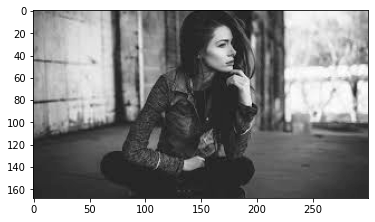

In [25]:
img = cv2.imread("bnw.jpg")
n, m = img.shape[:2]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

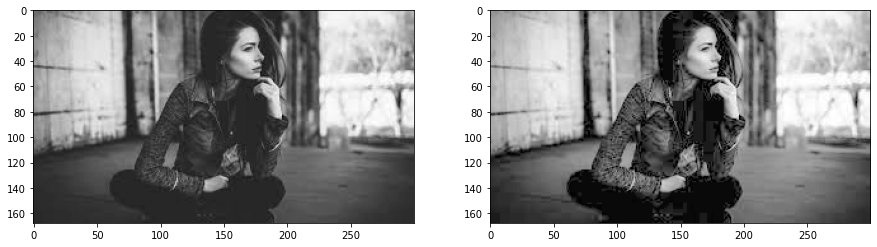

In [28]:
hist_vals = genHist(img, n, m)
new_img = equalizeImg(img.copy(), hist_vals, n, m)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(new_img, cmap="gray")
plt.show()

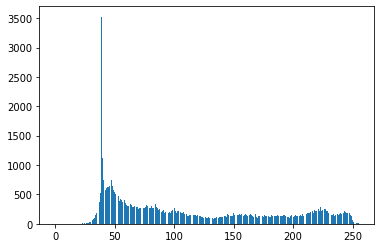

In [29]:
n,m = img.shape[:2]
hist_vals = genHist(img, n, m)
plt.bar(range(len(hist_vals)), hist_vals)
plt.show()